<h1 style='color:blue'>Assignments related to MatplotLib using Countries dataset</h1>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
cdf = pd.read_json("https://restcountries.eu/rest/v2/all")

In [5]:
cdf.columns

Index(['name', 'topLevelDomain', 'alpha2Code', 'alpha3Code', 'callingCodes',
       'capital', 'altSpellings', 'region', 'subregion', 'population',
       'latlng', 'demonym', 'area', 'gini', 'timezones', 'borders',
       'nativeName', 'numericCode', 'currencies', 'languages', 'translations',
       'flag', 'regionalBlocs', 'cioc'],
      dtype='object')

#### Draw bar graph showing total population for each region

In [6]:
region_population = cdf[(cdf['region'] != '')].groupby('region', as_index=False)['population'].sum()

Text(0, 0.5, 'Population')

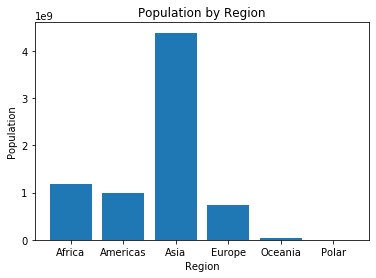

In [7]:
plt.bar(region_population['region'], region_population['population'])
plt.title("Population by Region")
plt.xlabel("Region")
plt.ylabel("Population")

#### Draw a pie chart showing total area for each region

In [8]:
region_area = cdf[(cdf['region'] != '')].groupby('region', as_index=False)['area'].sum()

Text(0.5, 1.0, 'Area by Region')

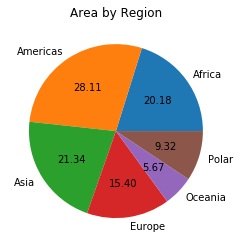

In [9]:
plt.pie(region_area['area'], labels = region_area['region'], autopct ="%.2f")
plt.title("Area by Region")

#### Display two pie charts - one for total population and one for total area for each region

In [10]:
region_population = cdf[(cdf['region'] != '')].groupby('region', as_index=False)['population'].sum()
region_area = cdf[(cdf['region'] != '')].groupby('region', as_index=False)['area'].sum()

Text(0.5, 1.0, 'Area by Region')

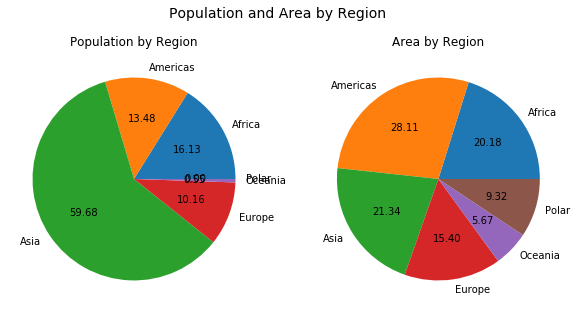

In [11]:
fig,ax = plt.subplots(1,2)
fig.suptitle('Population and Area by Region', fontsize=14)
fig.set_size_inches(10,5)
ax[0].pie(region_population['population'], labels = region_population['region'], autopct ="%.2f")
ax[0].set_title("Population by Region")

ax[1].pie(region_area['area'], labels = region_area['region'], autopct ="%.2f")
ax[1].set_title("Area by Region")

#### Display a histogram of population of countries in Asia

In [12]:
asia_countries = cdf[(cdf['region'] == 'Asia')]['population']

(array([45.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([3.44023000e+05, 1.38051837e+08, 2.75759652e+08, 4.13467466e+08,
        5.51175280e+08, 6.88883094e+08, 8.26590909e+08, 9.64298723e+08,
        1.10200654e+09, 1.23971435e+09, 1.37742217e+09]),
 <a list of 10 Patch objects>)

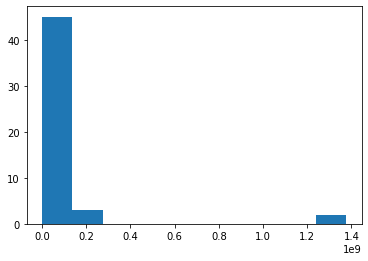

In [13]:
plt.hist(asia_countries)

#### Display one bar for total population in each subregion in Asia

In [14]:
asia_subregion = cdf[(cdf['region'] == 'Asia')].groupby('subregion', as_index=False)['population'].sum()

In [15]:
asia_subregion

,subregion,population
0,Central Asia,68722120
1,Eastern Asia,1615034420
2,South-Eastern Asia,632070274
3,Southern Asia,1807886040
4,Western Asia,262541930


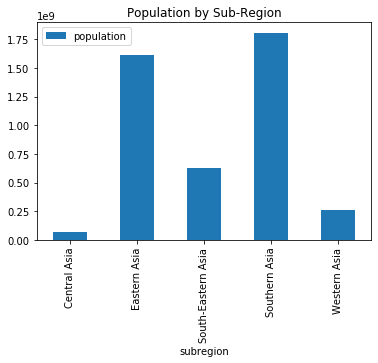

In [16]:
asia_subregion.plot(x='subregion', y='population',kind='bar',title='Population by Sub-Region')

#### Display scatter plot of population vs. area for countries in Europe

In [17]:
europe_countries = cdf[(cdf['region'] == 'Europe')][['name','population','area']]

Text(0, 0.5, 'Population')

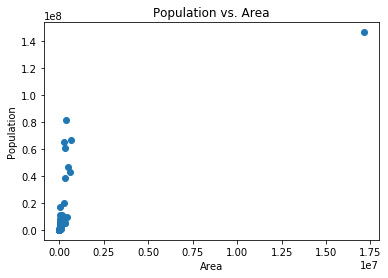

In [18]:
plt.scatter(europe_countries['area'], europe_countries['population'])
plt.title("Population vs. Area")
plt.xlabel("Area")
plt.ylabel("Population")

#### Display a pie chart for top 10 countries by population

Text(0.5, 1.0, 'Top 10 Countries by Population')

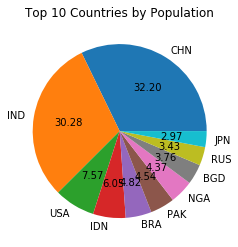

In [19]:
tc = cdf.sort_values(by='population', ascending=False).head(10)[['population','area','alpha3Code']]
plt.pie(tc['population'], labels = tc['alpha3Code'], autopct ="%.2f")
plt.title("Top 10 Countries by Population")

#### Display two histograms - one for density of population and another for area for countries in Asia

C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([42.,  3.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([3.0000000e+01, 9.6402810e+05, 1.9280262e+06, 2.8920243e+06,
        3.8560224e+06, 4.8200205e+06, 5.7840186e+06, 6.7480167e+06,
        7.7120148e+06, 8.6760129e+06, 9.6400110e+06]),
 <a list of 10 Patch objects>)

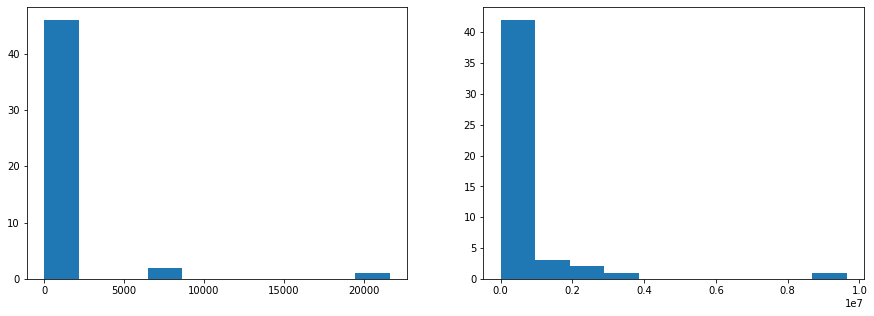

In [20]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(15,5)
asia_countries = cdf[(cdf['region'] == 'Asia')][['name','population','area']]
ax[0].hist(asia_countries['population']/asia_countries['area'])
ax[1].hist(asia_countries['area'])

#### Display bar graph for population of top 10 countries in Asia by area. Arrange bars in ascending order by population.

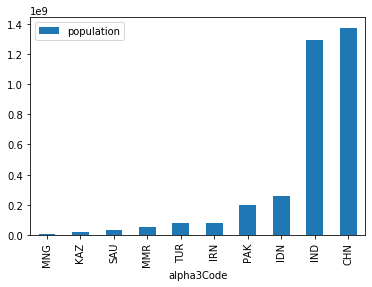

In [21]:
tc = cdf[(cdf['region'] == 'Asia')].sort_values(by='area', ascending=False).head(10)[['population','area','alpha3Code']]
tc.sort_values(by='population')[['alpha3Code','population']].plot(x='alpha3Code',kind='bar')

#### Display bar graph for density of population for top 10 countries and display density on the top of bar

In [22]:
cdf['density'] = cdf['population'] / cdf['area']

In [23]:
tc = cdf.sort_values(by='density', ascending=False).head(10)[['density','name','alpha3Code']]
tc

,density,name,alpha3Code
131,21636.666667,Macao,MAC
147,19009.900990,Monaco,MCO
202,7795.774648,Singapore,SGP
101,6634.329710,Hong Kong,HKG
86,5523.333333,Gibraltar,GIB
17,1836.470588,Bahrain,BHR
138,1346.151899,Malta,MLT
24,1147.296296,Bermuda,BMU
136,1146.743333,Maldives,MDV
203,1124.911765,Sint Maarten (Dutch part),SXM


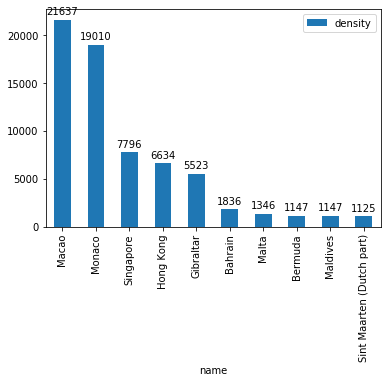

In [49]:
tc.plot(x='name',kind='bar')
# itertuples() returns named tuples  
for idx, t in enumerate(tc.itertuples()):
    plt.text(idx,t.density+ 500, f"{t.density:.0f}", horizontalalignment='center' )